In [124]:
import pandas as pd
import seaborn as sns
df=pd.read_csv('C:\\Users\\HP\\AppData\\Local\\Temp\\Rar$DI43.744\\train.csv')
df.head()
del df['Product_Category_2']
del df['Product_Category_3']
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [16]:
df['User_ID'].nunique()

5891

In [19]:
df['Product_ID'].nunique()

3631

In [22]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [24]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [26]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [27]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [28]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [29]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [31]:
df['Purchase'].mean()

9263.968712959126

In [32]:
for column in df.columns:
    print(column,df[column].nunique())

User_ID 5891
Product_ID 3631
Gender 2
Age 7
Occupation 21
City_Category 3
Stay_In_Current_City_Years 5
Marital_Status 2
Product_Category_1 20
Purchase 18105


In [47]:
len(df[df['Gender']=='M']),len(df[df['Gender']=='F'])

(414259, 135809)

In [48]:
data=pd.DataFrame({'Ratio':[len(df[df['Gender']=='M']),len(df[df['Gender']=='F'])]},index=['Male','female'])

<AxesSubplot:ylabel='Ratio'>

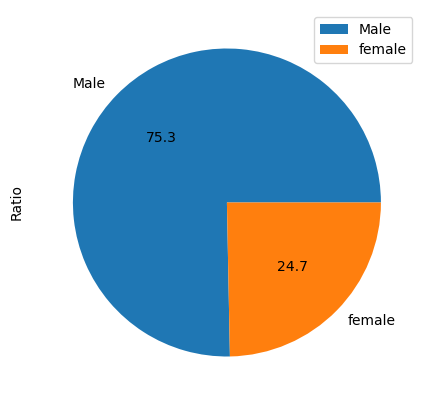

In [55]:
data.plot.pie(y='Ratio',figsize=(5,5),autopct='%.1f')

<AxesSubplot:title={'center':'GENDER RATIO'}, ylabel='None'>

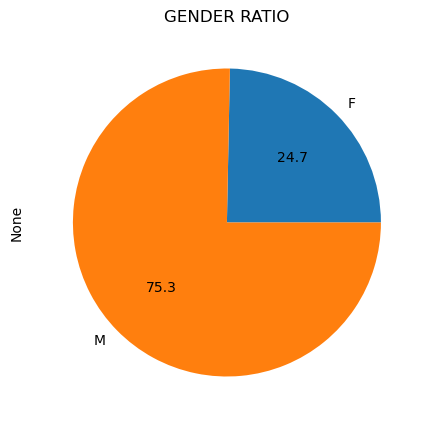

In [54]:
df.groupby('Gender').size().plot(kind='pie',autopct='%.1f',title='GENDER RATIO',figsize=(5,5))


<AxesSubplot:title={'center':'GENDER RATIO'}, xlabel='Gender'>

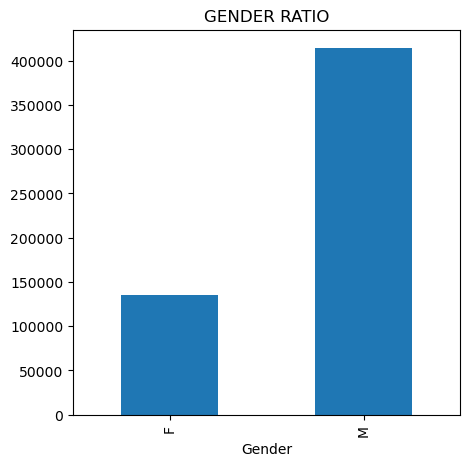

In [56]:
df.groupby('Gender').size().plot(kind='bar',title='GENDER RATIO',figsize=(5,5))


<AxesSubplot:ylabel='Purchase'>

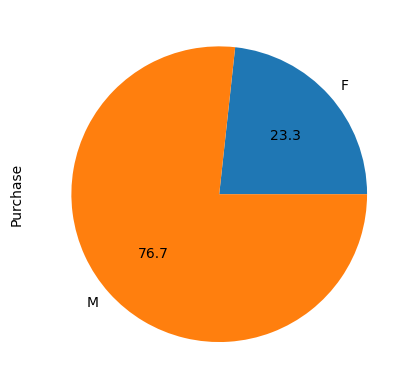

In [59]:
df.groupby('Gender').sum()['Purchase'].plot(kind='pie',autopct='%.1f')

<AxesSubplot:ylabel='Purchase'>

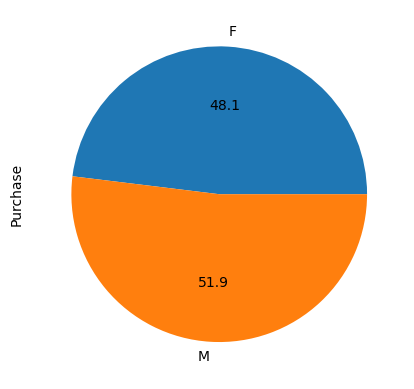

In [60]:
df.groupby('Gender').mean()['Purchase'].plot(kind='pie',autopct='%.1f')

<AxesSubplot:title={'center':'PURCHASE DISTRIBUTION BY AGE'}, xlabel='Age'>

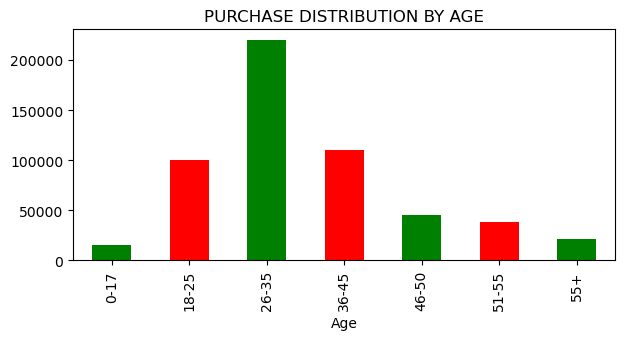

In [63]:
df.groupby('Age').size().plot.bar(figsize=(7,3),title='PURCHASE DISTRIBUTION BY AGE',color=['green','red'])

In [68]:
list=[]
for i in df['Age'].unique():
    list.append([i,df[df['Age']==i]['Product_ID'].nunique()])
data=pd.DataFrame(list,columns=['Age','Products'])

<AxesSubplot:>

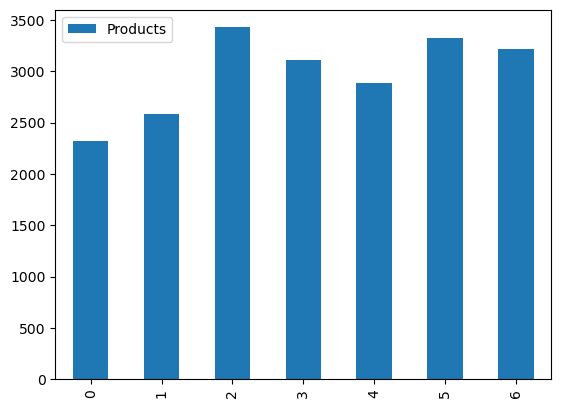

In [70]:
data.plot.bar()

<AxesSubplot:title={'center':'PURCHASE DISTRIBUTION BY AGE'}, xlabel='Age'>

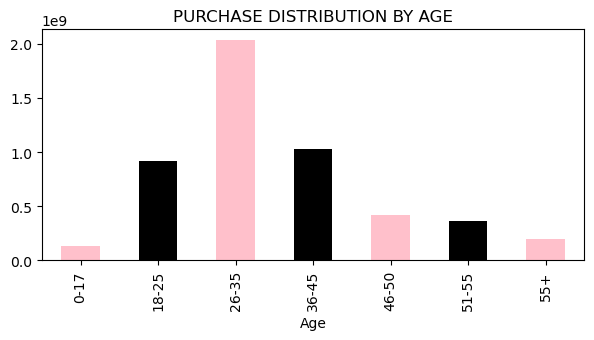

In [73]:
df.groupby('Age').sum()['Purchase'].plot.bar(figsize=(7,3),title='PURCHASE DISTRIBUTION BY AGE',color=['pink','black'])

<AxesSubplot:ylabel='Purchase'>

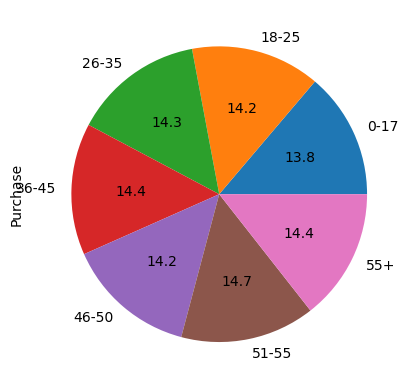

In [74]:
df.groupby('Age').mean()['Purchase'].plot(kind='pie',autopct='%.1f')

<AxesSubplot:ylabel='None'>

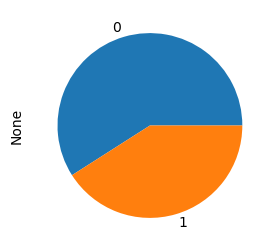

In [78]:
df.groupby('Marital_Status').size().plot.pie(figsize=(7,3))

<AxesSubplot:xlabel='Age', ylabel='count'>

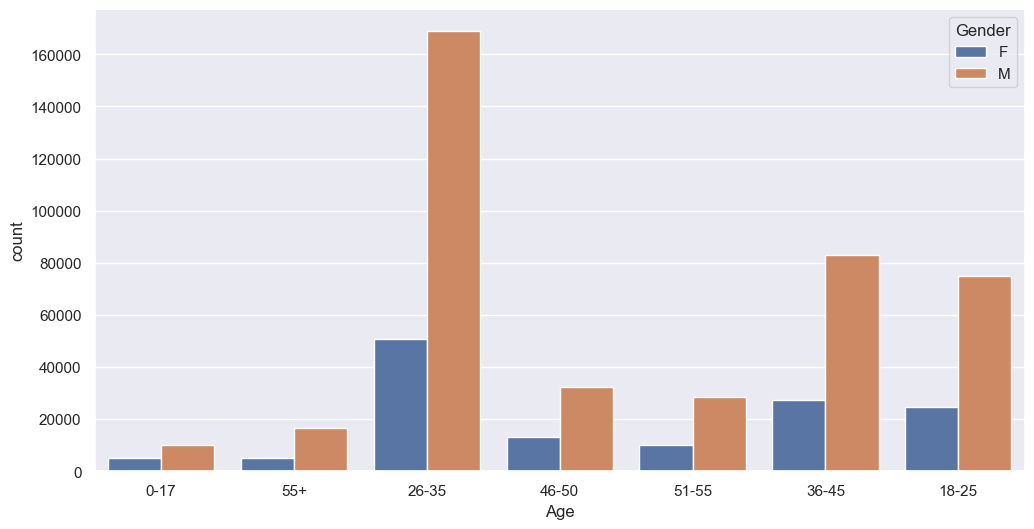

In [83]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Age',hue='Gender',data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

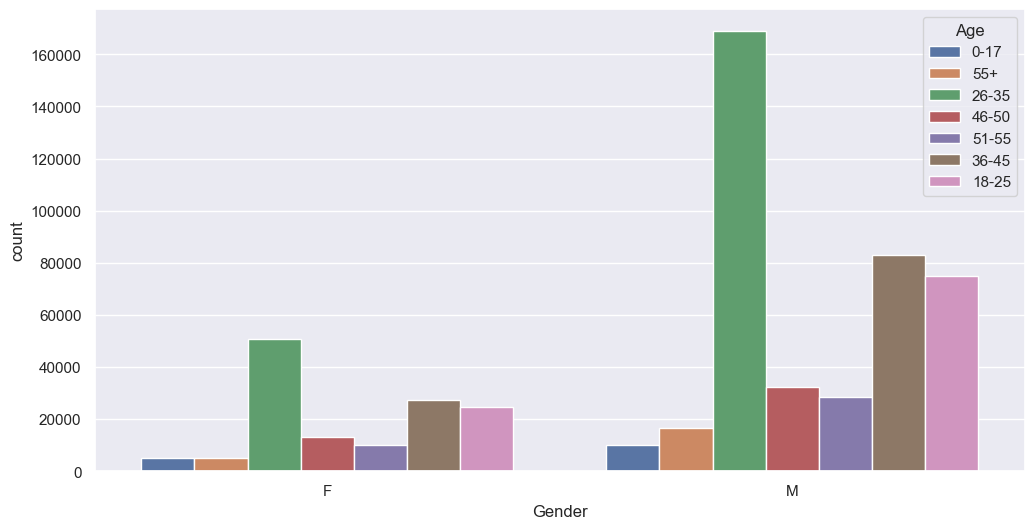

In [84]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Gender',hue='Age',data=df)

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

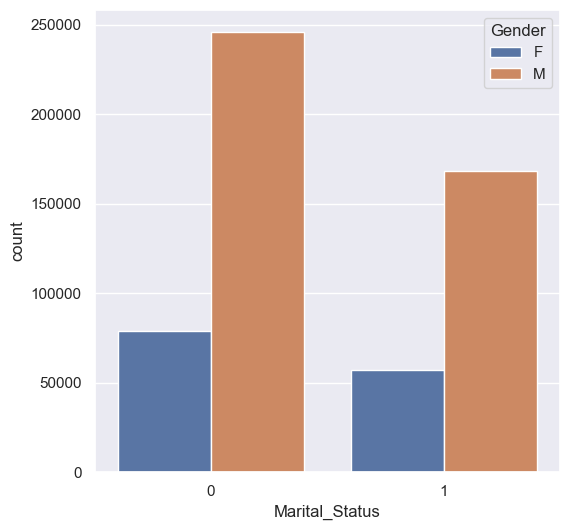

In [88]:
sns.set(rc={'figure.figsize':(6,6)})
sns.countplot(x='Marital_Status',hue='Gender',data=df)

<AxesSubplot:xlabel='City_Category', ylabel='count'>

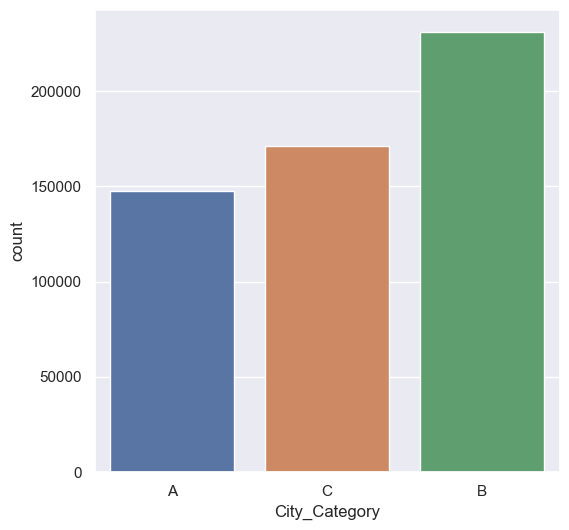

In [90]:
sns.countplot(x=df['City_Category'])

<AxesSubplot:xlabel='City_Category', ylabel='count'>

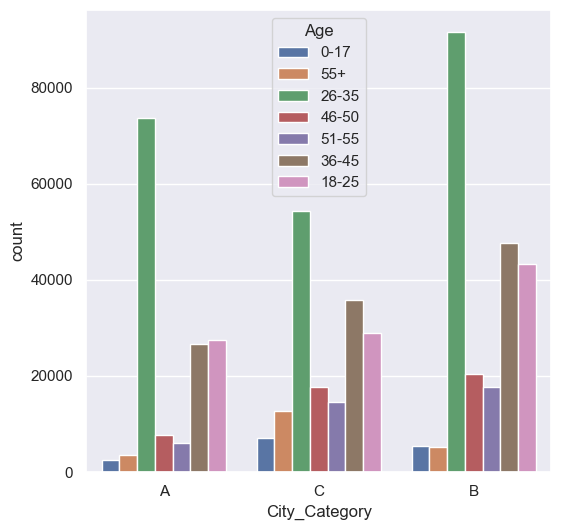

In [91]:
sns.countplot(x='City_Category',hue='Age',data=df)

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

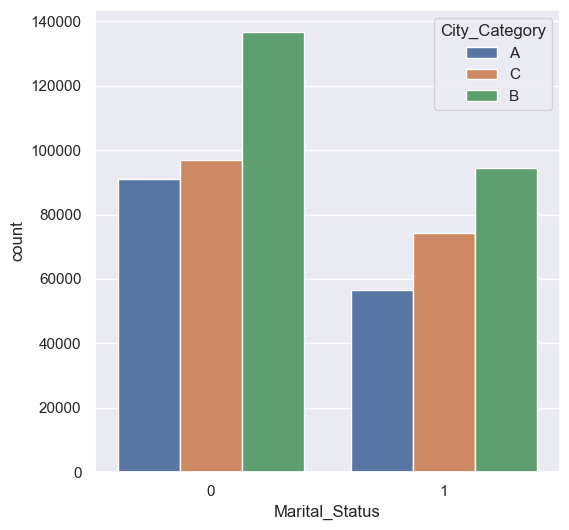

In [93]:
sns.countplot(x='Marital_Status',hue='City_Category',data=df)

<AxesSubplot:ylabel='Purchase'>

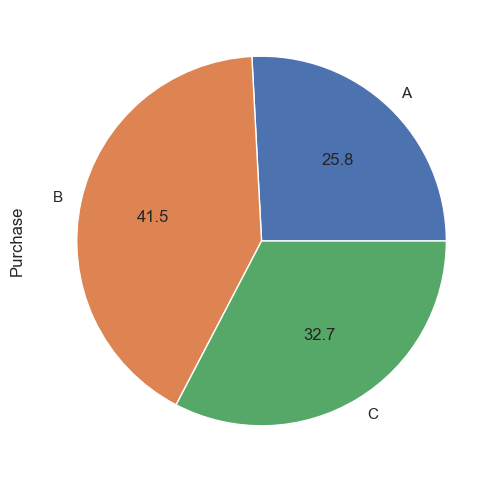

In [96]:
df.groupby('City_Category').sum()['Purchase'].plot.pie(autopct='%.1f')

<AxesSubplot:ylabel='Purchase'>

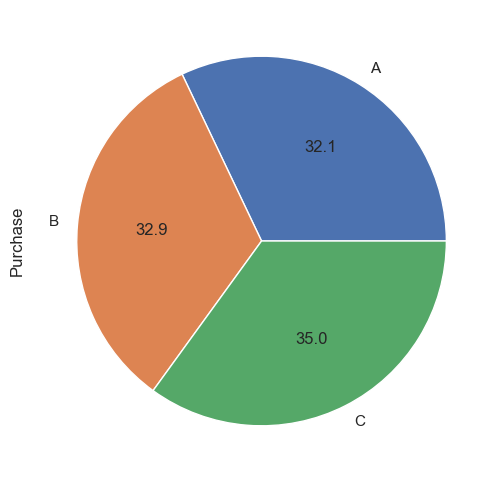

In [97]:
df.groupby('City_Category').mean()['Purchase'].plot.pie(autopct='%.1f')

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

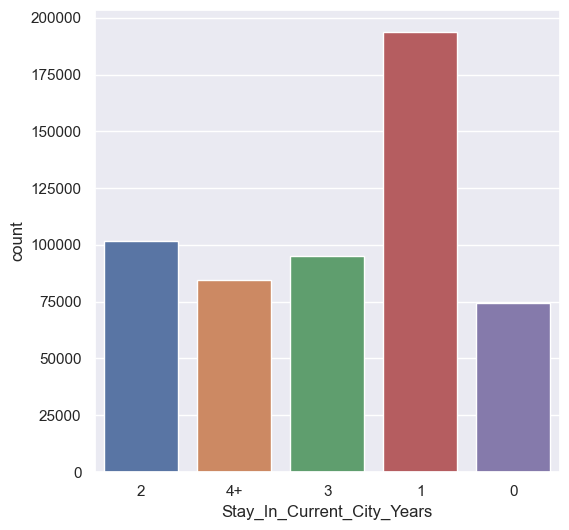

In [99]:
sns.countplot(x='Stay_In_Current_City_Years',data=df)

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

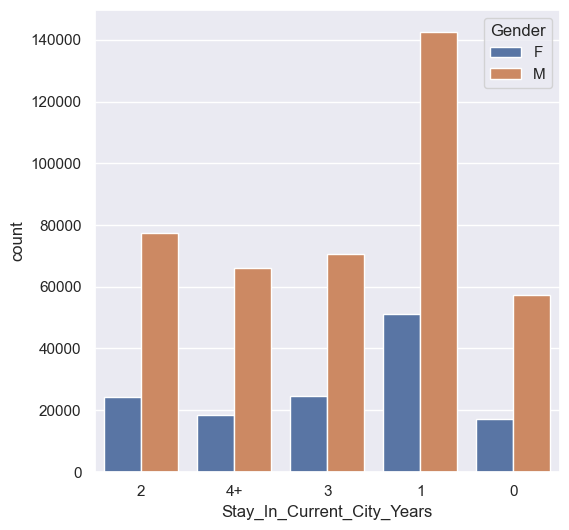

In [100]:
sns.countplot(x='Stay_In_Current_City_Years',hue='Gender',data=df)

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

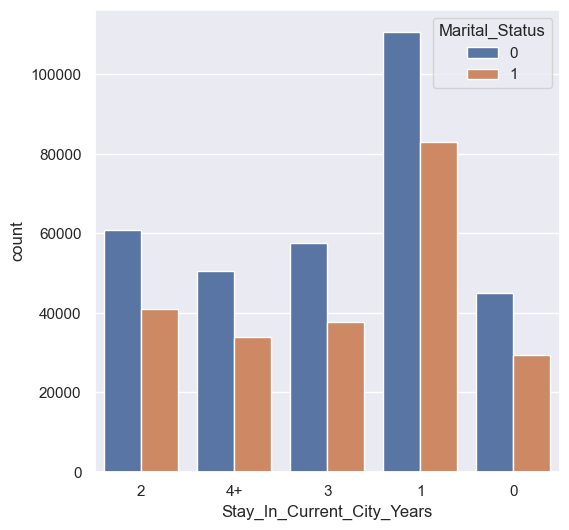

In [101]:
sns.countplot(x='Stay_In_Current_City_Years',hue='Marital_Status',data=df)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

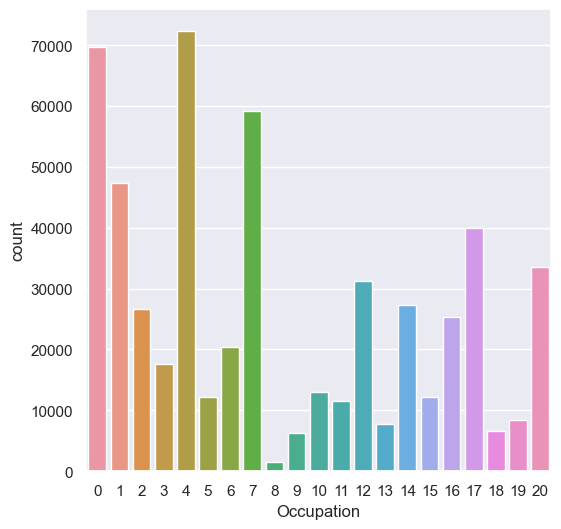

In [102]:
sns.countplot(x=df['Occupation'])

<AxesSubplot:xlabel='Occupation'>

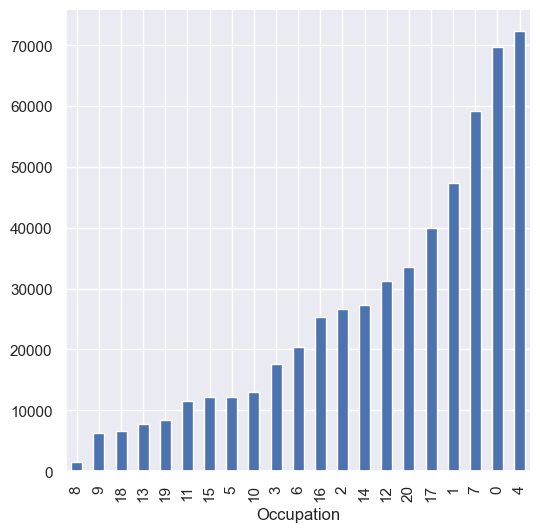

In [103]:
df.groupby('Occupation').size().sort_values().plot.bar()

<AxesSubplot:xlabel='Occupation'>

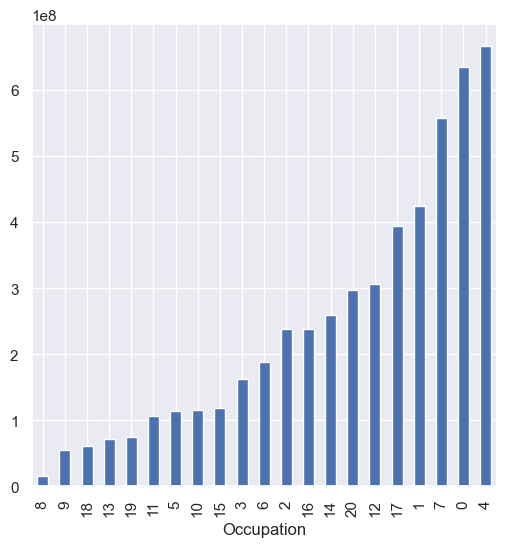

In [105]:
df.groupby('Occupation').sum()['Purchase'].sort_values().plot.bar()

<AxesSubplot:xlabel='Occupation'>

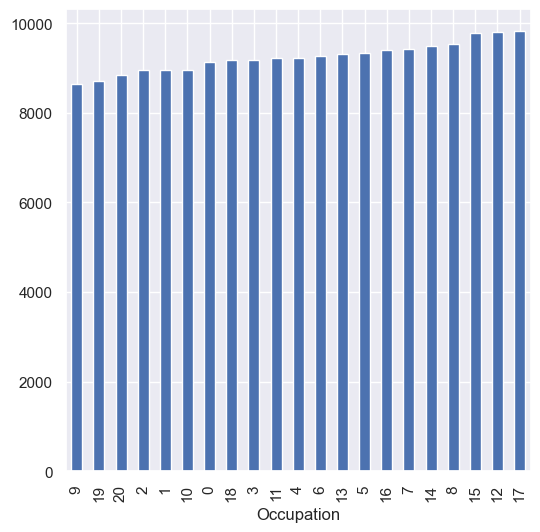

In [106]:
df.groupby('Occupation').mean()['Purchase'].sort_values().plot.bar()

<AxesSubplot:xlabel='Occupation', ylabel='count'>

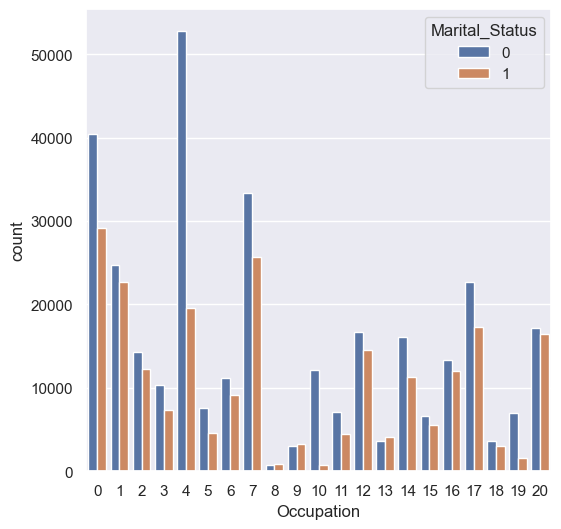

In [107]:
sns.countplot(x='Occupation',hue='Marital_Status',data=df)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

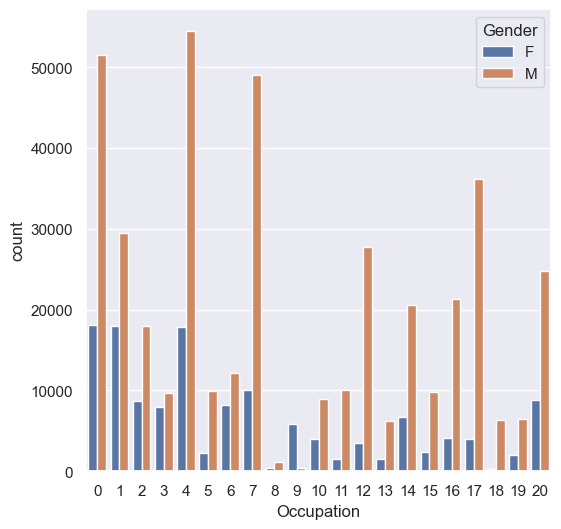

In [108]:
sns.countplot(x='Occupation',hue='Gender',data=df)

<AxesSubplot:xlabel='Occupation'>

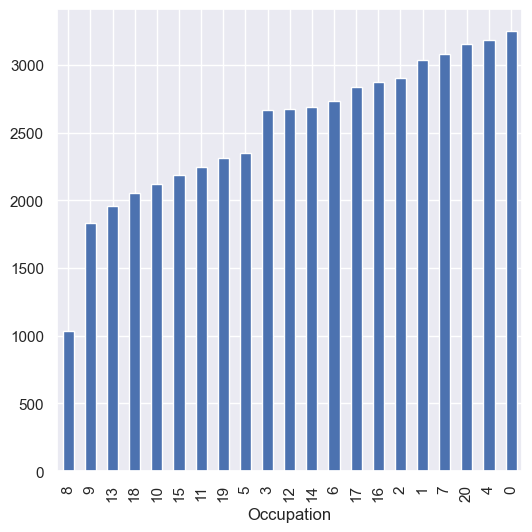

In [110]:
df.groupby('Occupation').nunique()['Product_ID'].sort_values().plot.bar()

<AxesSubplot:xlabel='Product_Category_1'>

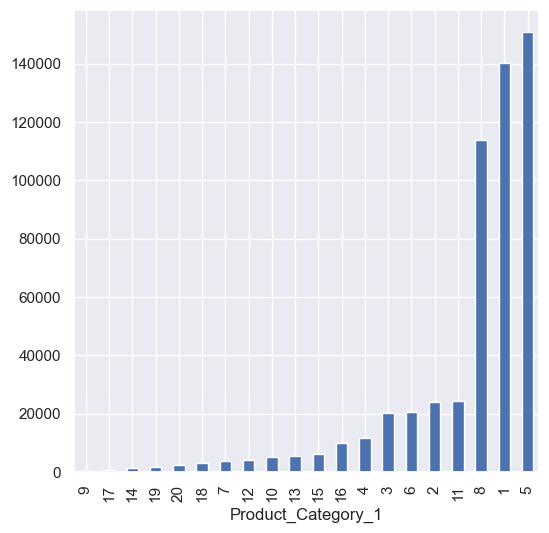

In [111]:
df.groupby('Product_Category_1').size().sort_values().plot.bar()

<AxesSubplot:xlabel='Product_Category_1'>

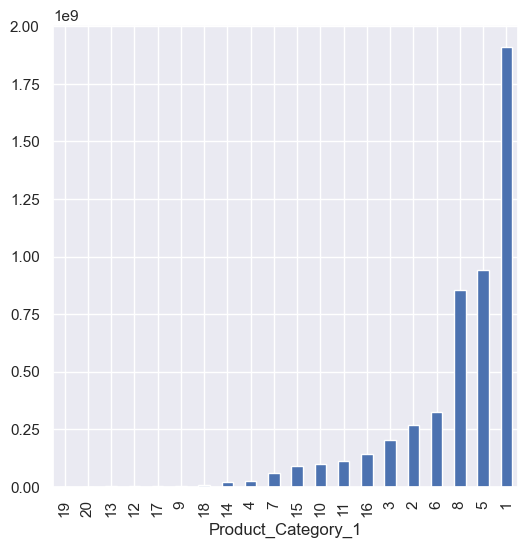

In [112]:
df.groupby('Product_Category_1').sum()['Purchase'].sort_values().plot.bar()

<AxesSubplot:xlabel='Product_Category_1'>

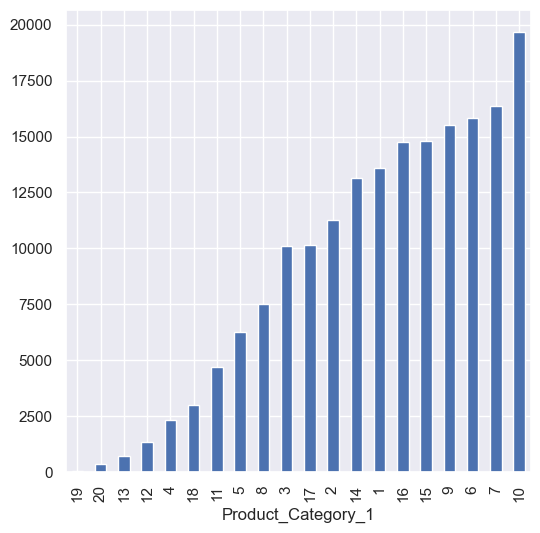

In [113]:
df.groupby('Product_Category_1').mean()['Purchase'].sort_values().plot.bar()

<AxesSubplot:xlabel='Product_ID'>

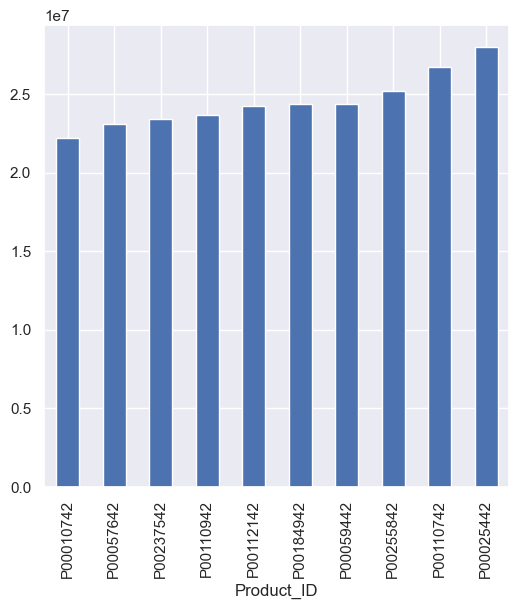

In [115]:
df.groupby('Product_ID').sum()['Purchase'].nlargest(10).sort_values().plot.bar()

<AxesSubplot:xlabel='Product_ID'>

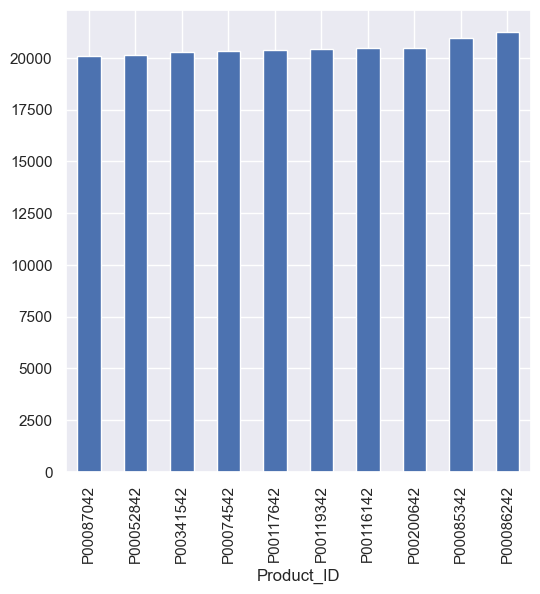

In [116]:
df.groupby('Product_ID').mean()['Purchase'].nlargest(10).sort_values().plot.bar()

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

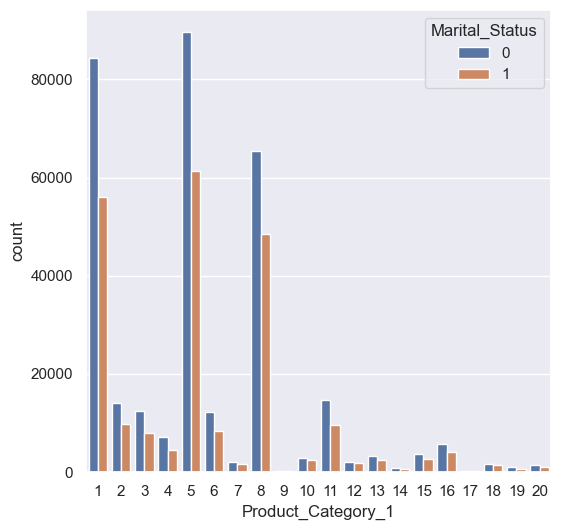

In [117]:
sns.countplot(x='Product_Category_1',hue='Marital_Status',data=df)

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

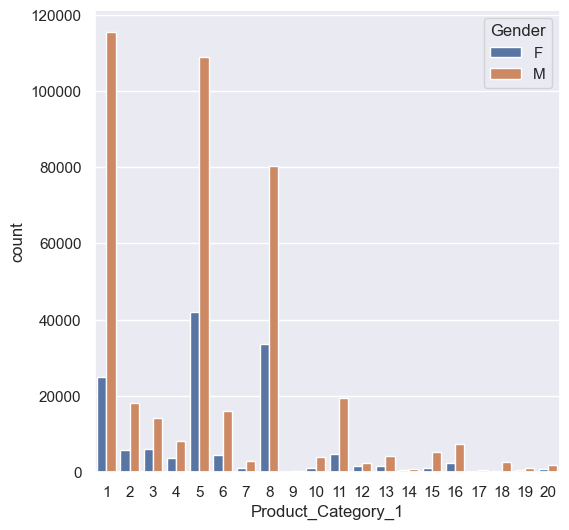

In [118]:
sns.countplot(x='Product_Category_1',hue='Gender',data=df)

In [128]:
l=[]
for i in range(len(df)):
    l.append(df['Gender'][i]+"_"+str(df['Marital_Status'][i]))
df['MaritalGender']=l

In [120]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,MaritalGender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


<AxesSubplot:xlabel='MaritalGender', ylabel='count'>

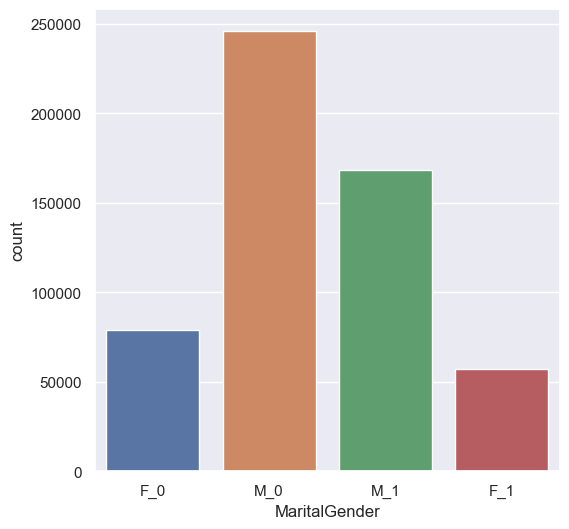

In [129]:
sns.countplot(x=df['MaritalGender'])

<AxesSubplot:xlabel='Age', ylabel='count'>

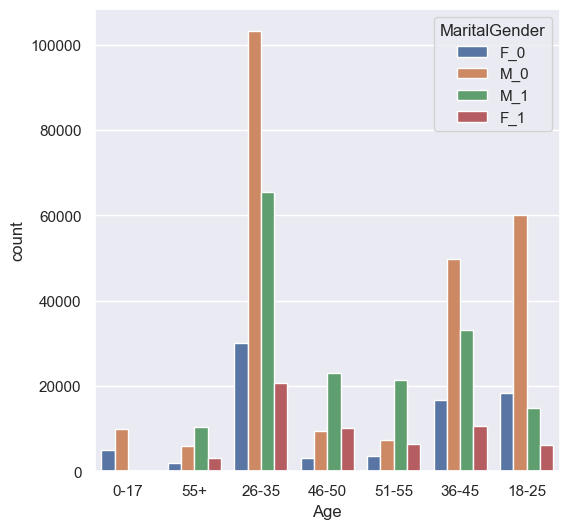

In [130]:
sns.countplot(x=df['Age'],hue=df['MaritalGender'])

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

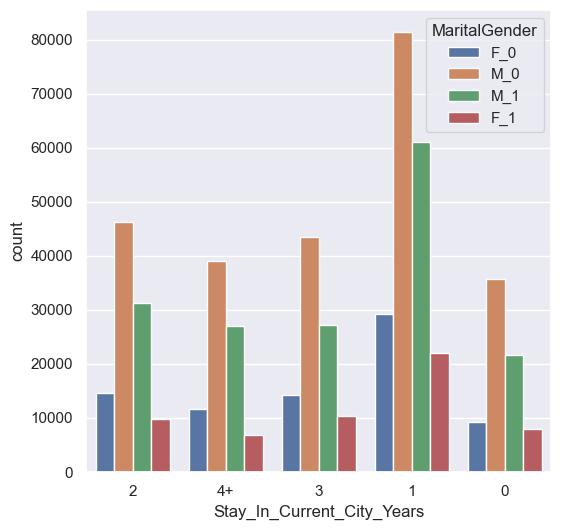

In [131]:
sns.countplot(x=df['Stay_In_Current_City_Years'],hue=df['MaritalGender'])

<AxesSubplot:xlabel='City_Category', ylabel='count'>

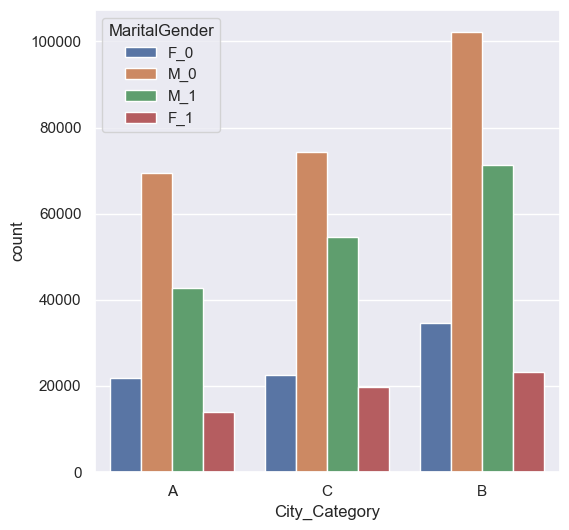

In [132]:
sns.countplot(x=df['City_Category'],hue=df['MaritalGender'])